
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

In [3]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [4]:
X = ha[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = ha['cp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

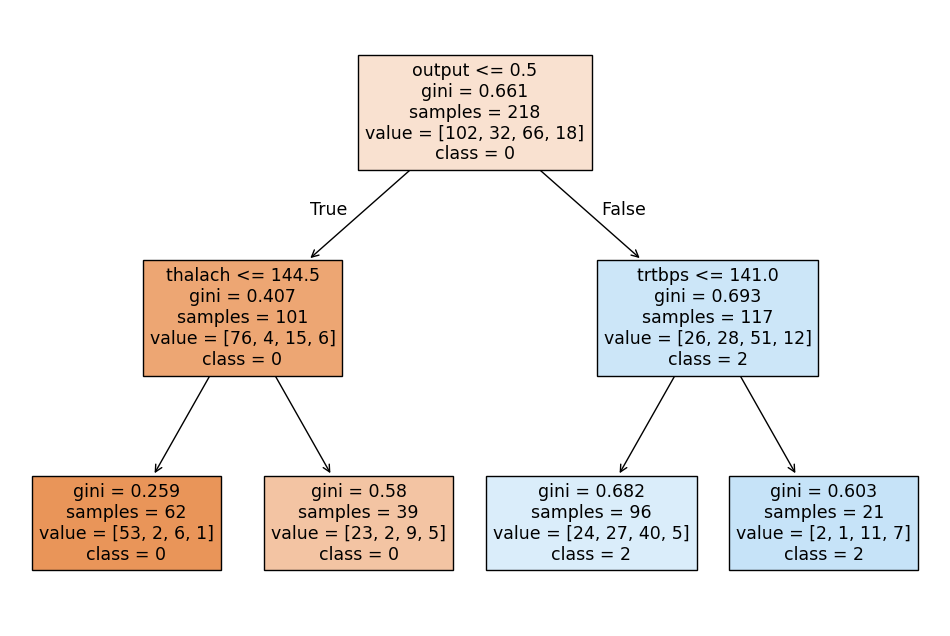

In [6]:
#Decision tree
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['0', '1', '2', '3'], filled=True)
plt.show()

The first split in the tree is based on whether the output is greater than or equal to 0.5. There was 101 samples where that was true, and 117 where that was false.

In [7]:
#LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [ ]:
ha['cp_is_3'] = (ha['cp'] == 3).astype(int)
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_0,cp_is_1,cp_is_2
0,63,1,3,145,233,0,150,1,1,0,0,0
1,37,1,2,130,250,1,187,1,0,0,0,1
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,1,0,0
4,57,1,0,140,192,1,148,1,0,1,0,0


In [ ]:
X = ha[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = ha['cp_is_3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for cp_is_3: {f1}")

F1 Score for cp_is_3: 0.0


In [ ]:
ha['cp_is_0'] = (ha['cp'] == 0).astype(int)

X = ha[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = ha['cp_is_0']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for cp_is_0: {f1}")

F1 Score for cp_is_0: 0.6792452830188679


In [ ]:
ha['cp_is_1'] = (ha['cp'] == 1).astype(int)

X = ha[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = ha['cp_is_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for cp_is_1: {f1}")

F1 Score for cp_is_1: 0.0


In [ ]:
ha['cp_is_2'] = (ha['cp'] == 2).astype(int)

X = ha[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = ha['cp_is_2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for cp_is_2: {f1}")

F1 Score for cp_is_2: 0.11764705882352941


The category where cp_is_0 had an F1 Score of 0.679 which is the highest among the four.

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [ ]:
#cp types 0 and 1
ha_01 = ha[ha['cp'].isin([0, 1])]

X = ha_01[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = (ha_01['cp'] == 1).astype(int)  # Target: 1 if cp is 1, 0 otherwise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of cp being 1
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC for cp types 0 vs 1: {roc_auc}")

ROC-AUC for cp types 0 vs 1: 0.7572463768115942


In [ ]:
#cp types 0 and 2
ha_02 = ha[ha['cp'].isin([0, 2])]

X = ha_02[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = (ha_02['cp'] == 0).astype(int)  # Target: 1 if cp is 0, 2 otherwise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of cp being 1
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC for cp types 0 vs 2: {roc_auc}")

ROC-AUC for cp types 0 vs 2: 0.8112244897959183


In [ ]:
#cp types 0 and 3
ha_03 = ha[ha['cp'].isin([0, 3])]

X = ha_03[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = (ha_03['cp'] == 0).astype(int)  # Target: 1 if cp is 0, 3 otherwise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of cp being 1
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC for cp types 0 vs 3: {roc_auc}")

ROC-AUC for cp types 0 vs 3: 0.8571428571428572


In [ ]:
#cp types 1 and 2
ha_12 = ha[ha['cp'].isin([1, 2])]

X = ha_12[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = (ha_12['cp'] == 2).astype(int)  # Target: 1 if cp is 2, 0 otherwise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC for cp types 1 vs 2: {roc_auc}")

ROC-AUC for cp types 1 vs 2: 0.6298701298701298


In [ ]:
#cp types 1 and 3
ha_13 = ha[ha['cp'].isin([1, 3])]

X = ha_13[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = (ha_13['cp'] == 3).astype(int)  # Target: 1 if cp is 3, 0 otherwise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC for cp types 1 vs 3: {roc_auc}")

ROC-AUC for cp types 1 vs 3: 0.5750000000000001


In [ ]:
#cp types 2 and 3
ha_23 = ha[ha['cp'].isin([2, 3])]

X = ha_23[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = (ha_23['cp'] == 3).astype(int)  # Target: 1 if cp is 3, 0 otherwise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC for cp types 2 vs 3: {roc_auc}")

ROC-AUC for cp types 2 vs 3: 0.6


The pair of cp types 0 vs 3 was the best at distinguising as it has the highest ROC-AUC score of 0.85, which means its better at separating the two classes.